In [12]:
import pandas as pd
df = pd.read_csv(r"C:\Users\96181\Desktop\MatchMaker data\profiles.csv")
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [14]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [15]:
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [16]:
df['essays'] = (
    df['essay0'].fillna('') + ' ' +
    df['essay1'].fillna('') + ' ' +
    df['essay2'].fillna('') + ' ' +
    df['essay3'].fillna('') + ' ' +
    df['essay4'].fillna('') + ' ' +
    df['essay5'].fillna('') + ' ' +
    df['essay6'].fillna('') + ' ' +
    df['essay7'].fillna('') + ' ' +
    df['essay8'].fillna('') + ' ' +
    df['essay9'].fillna('')
)
df = df.drop(columns=[f"essay{i}" for i in range(10)])

In [17]:
df = df.drop(columns=['offspring', 'pets', 'religion'])


In [18]:
df['height'] = df['height'].fillna(df['height'].median())
df['drinks'] = df['drinks'].fillna('unknown')
df['smokes'] = df['smokes'].fillna('unknown')


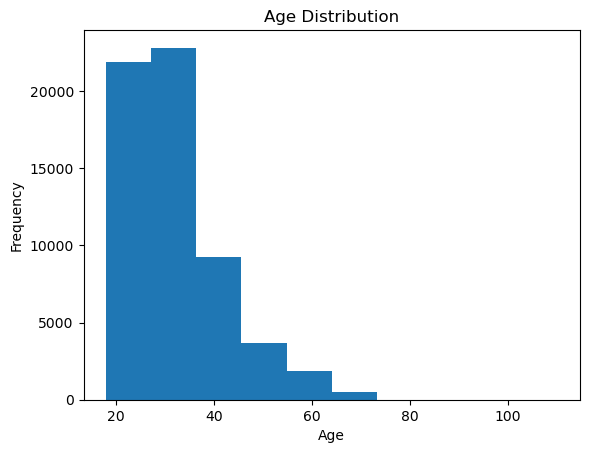

In [19]:
import matplotlib.pyplot as plt

plt.hist(df['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [20]:
df['age'].min(), df['age'].max()


(18, 110)

In [22]:
df = df[(df['age'] >= 18) & (df['age'] <= 70)]
df['age'].min(), df['age'].max()


(18, 69)

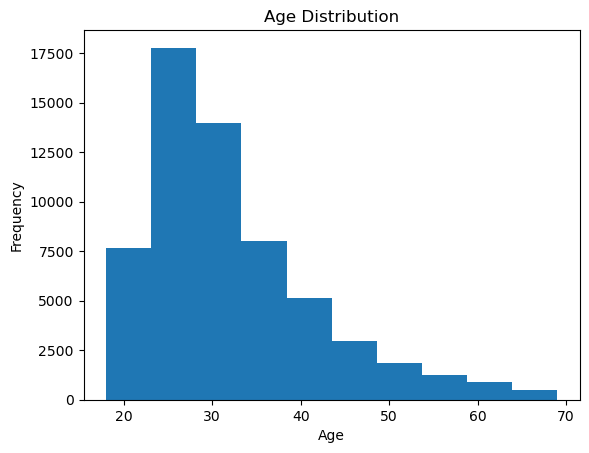

In [23]:
import matplotlib.pyplot as plt

plt.hist(df['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


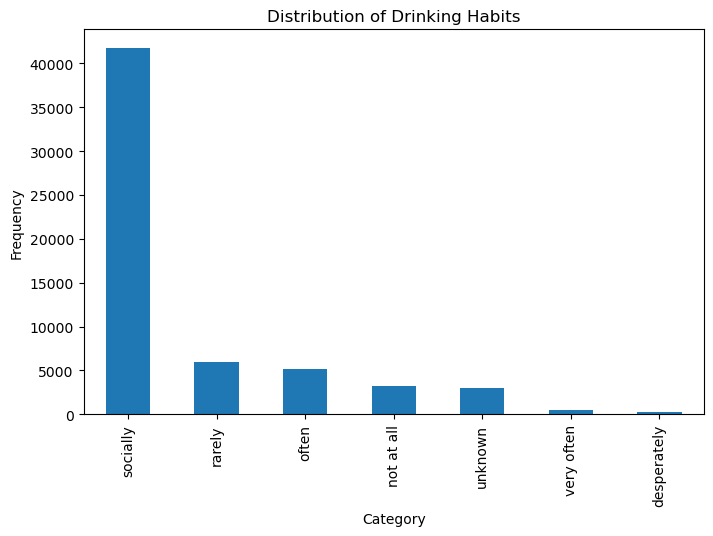

In [24]:
plt.figure(figsize=(8,5))
df['drinks'].value_counts().plot(kind='bar')
plt.title("Distribution of Drinking Habits")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()


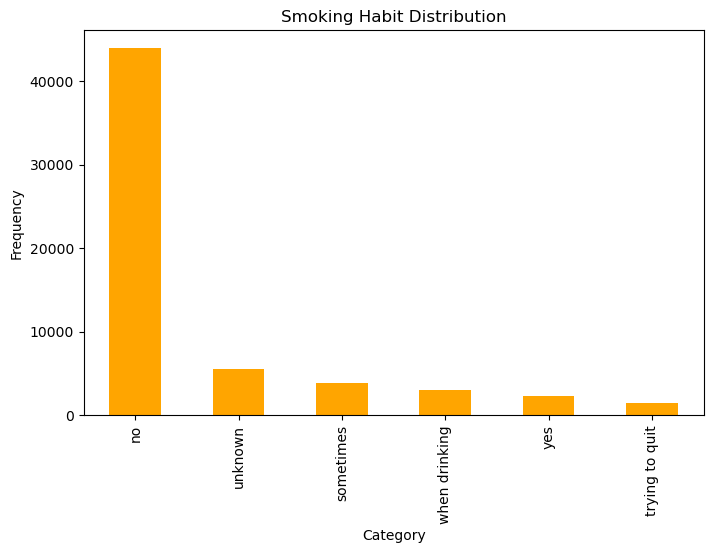

In [25]:
plt.figure(figsize=(8,5))
df['smokes'].value_counts().plot(kind='bar', color='orange')
plt.title("Smoking Habit Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()


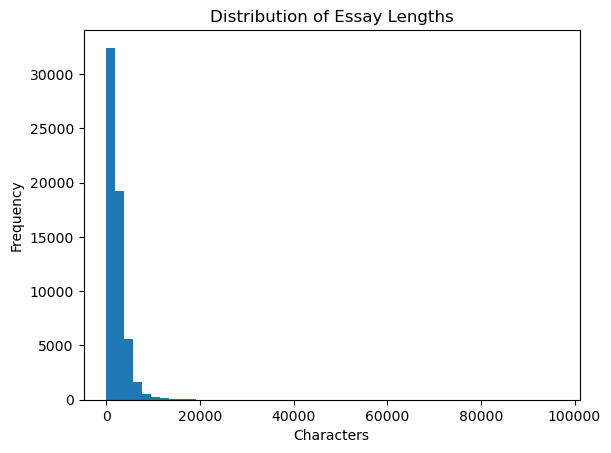

In [26]:
df['essay_length'] = df['essays'].apply(len)

plt.hist(df['essay_length'], bins=50)
plt.title("Distribution of Essay Lengths")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()


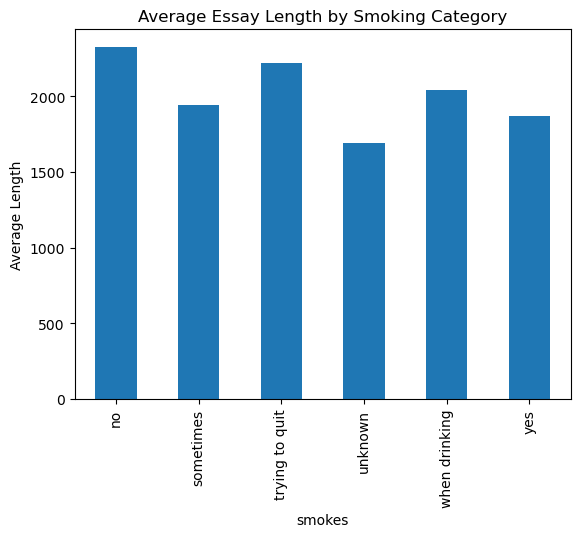

In [27]:
df.groupby('smokes')['essay_length'].mean().plot(kind='bar')
plt.title("Average Essay Length by Smoking Category")
plt.ylabel("Average Length")
plt.show()
